**1. Exploratory data analysis**

In [1]:
import pandas as pd

In [152]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [153]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [13]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [139]:
df['bank_asset_value'].max()

14700000

In [14]:
#check fo null values
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [155]:
#dolumn name contains space i the beginning we have to remove it
df.columns = df.columns.str.strip()

In [156]:
df['loan_status'] = df['loan_status'].str.strip().str.capitalize()

In [157]:
# check for target variable distribution
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

#Data visualization

In [20]:
from matplotlib import pyplot as plt
import seaborn as sb

for categorical columns - education andself employed

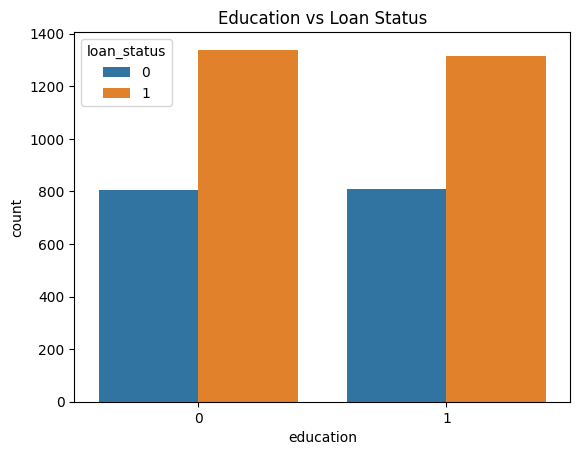

In [148]:
#1. for Education and loanstatus
sb.countplot(data=df, x='education', hue='loan_status')
plt.title("Education vs Loan Status")
plt.show()

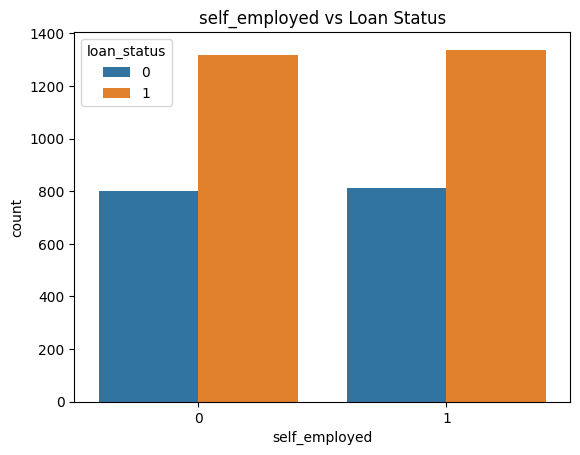

In [147]:
sb.countplot(data=df, x='self_employed', hue='loan_status')
plt.title("self_employed vs Loan Status")
plt.show()

For Numerical columns income_annum, loan_amount,cibil_score.
Boxplots (loan_amount vs loan_status, income_annum vs loan_status)

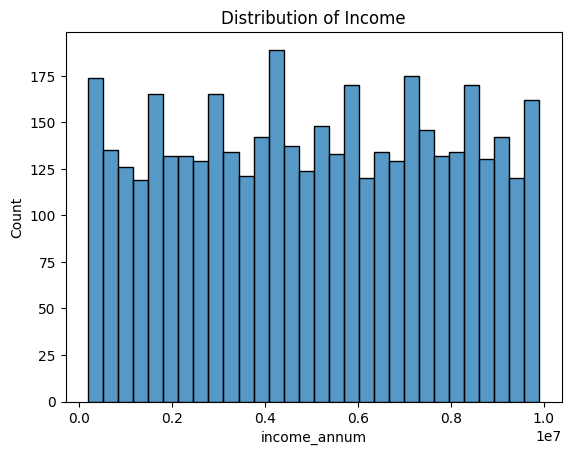

In [42]:
sb.histplot(df['income_annum'], bins=30)
plt.title("Distribution of Income")
plt.show()

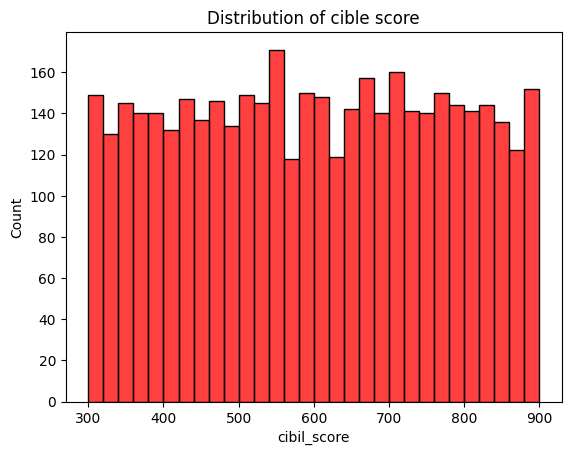

In [58]:
sb.histplot(df['cibil_score'], bins=30,color='red')
plt.title("Distribution of cible score")
plt.show()

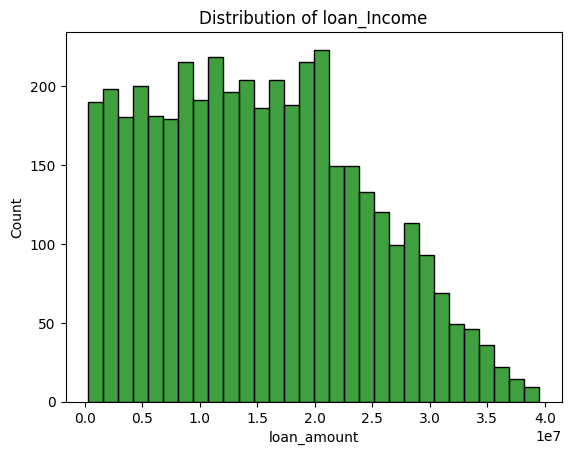

In [158]:
sb.histplot(df['loan_amount'], bins=30,color='green')
plt.title("Distribution of loan_Income")
plt.show()

**Checking for outliers**

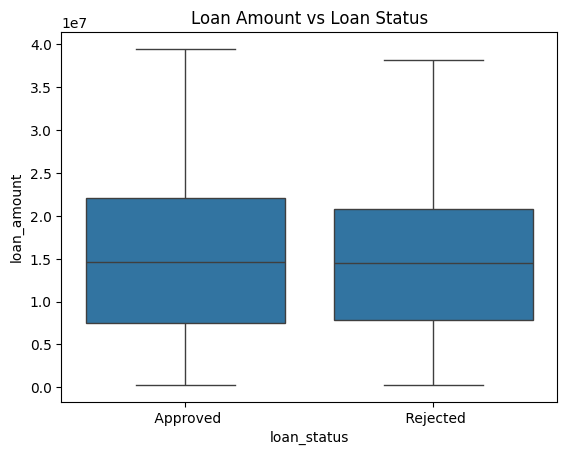

In [44]:
sb.boxplot(data=df, x='loan_status', y='loan_amount')
plt.title("Loan Amount vs Loan Status")
plt.show()

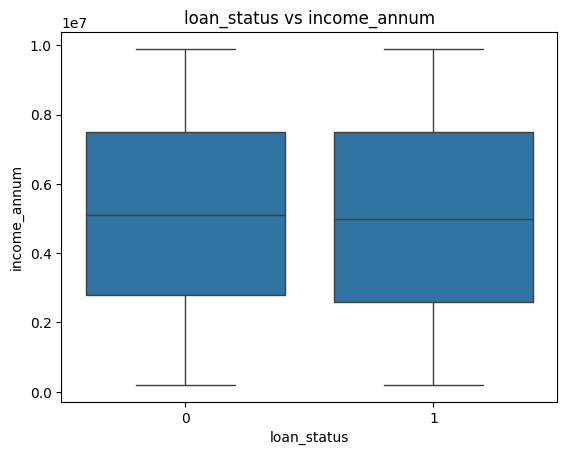

In [159]:
sb.boxplot(data=df, x='loan_status', y='income_annum')
plt.title("loan_status vs income_annum")
plt.show()

In [61]:
#finding corelation for numberic columns
num_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['loan_id'])
num_df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [63]:
corr = num_df.corr()
corr

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


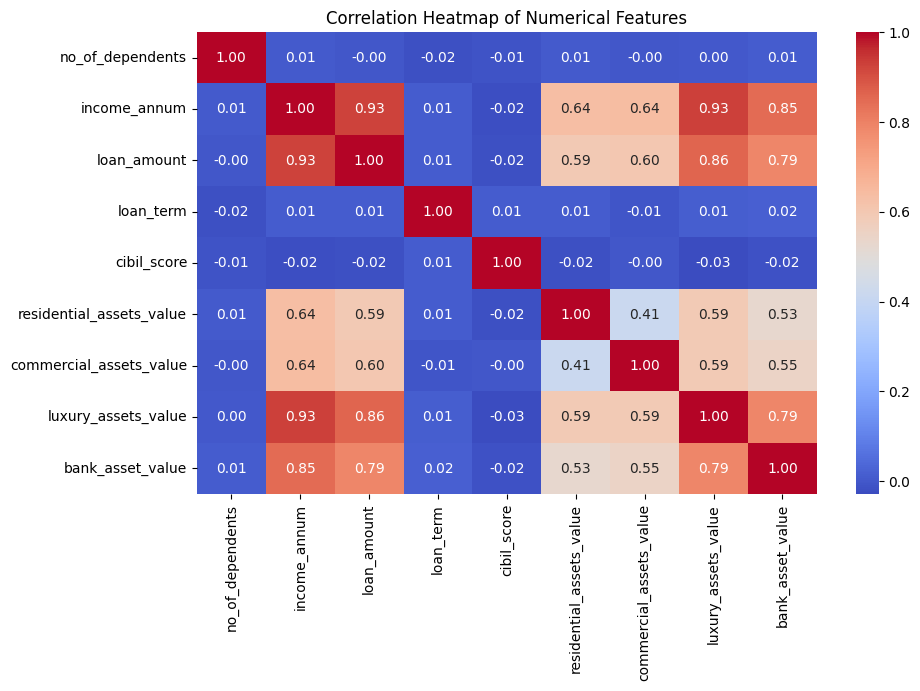

In [65]:
plt.figure(figsize=(10,6))
sb.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [92]:
df['loan_status'].value_counts()

,count
loan_status,
1,2656
0,1613


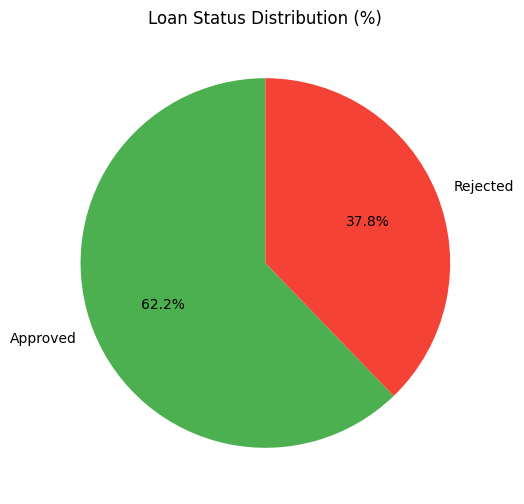

In [95]:
loan_status_counts = df['loan_status'].value_counts(normalize=True) * 100

# Labels
labels = ['Approved' if i==1 else 'Rejected' for i in loan_status_counts.index]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(loan_status_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#4CAF50','#F44336'])
plt.title("Loan Status Distribution (%)")
plt.show()

#Model selection

Its a classification problem

we can use
* Logistic Regression
*K-Nearest Neighbors (KNN)
*Support Vector Machine (SVM)
*Decision Tree
*Random Forest
*Naive Bayes

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Label encoing for categorical features

In [97]:
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])

Scalling the numerical features

In [102]:
new_df = df.copy()
num_cols = ['income_annum', 'loan_amount', 'cibil_score','residential_assets_value',
            'commercial_assets_value', 'luxury_assets_value','bank_asset_value']
scaler = StandardScaler()

for col in num_cols:
    new_df[col] = scaler.fit_transform(df[[col]])

Train test split

In [103]:
#selecting X and Y
X = new_df.drop(columns=['loan_id', 'loan_status'])
y = df['loan_status']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [108]:
X_train.shape, X_test.shape

((3201, 11), (1068, 11))

In [109]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
}

# Model evaluation

In [115]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "ROC-AUC": auc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }




In [117]:
# Show results
for model, metrics in results.items():
    print(f"\n{model}")
    if model == 'Logistic Regression':
      print(f"Accuracy: {metrics['Accuracy']:.4f}")
      print(f"ROC-AUC: {metrics['ROC-AUC']:.4f}")
    else:
      print(f"Accuracy: {metrics['Accuracy']:.4f}")
      print(f"Precision: {metrics['Precision']:.4f}")
      print(f"Recall: {metrics['Recall']:.4f}")
      print(f"F1-Score: {metrics['F1-Score']:.4f}")


Logistic Regression
Accuracy: 0.9045
ROC-AUC: 0.9691

KNN
Accuracy: 0.8876
Precision: 0.9055
Recall: 0.9189
F1-Score: 0.9122

SVM
Accuracy: 0.9326
Precision: 0.9496
Recall: 0.9440
F1-Score: 0.9467

Decision Tree
Accuracy: 0.9803
Precision: 0.9824
Recall: 0.9867
F1-Score: 0.9845

Random Forest
Accuracy: 0.9841
Precision: 0.9853
Recall: 0.9897
F1-Score: 0.9875

Naive Bayes
Accuracy: 0.9345
Precision: 0.9606
Recall: 0.9351
F1-Score: 0.9477


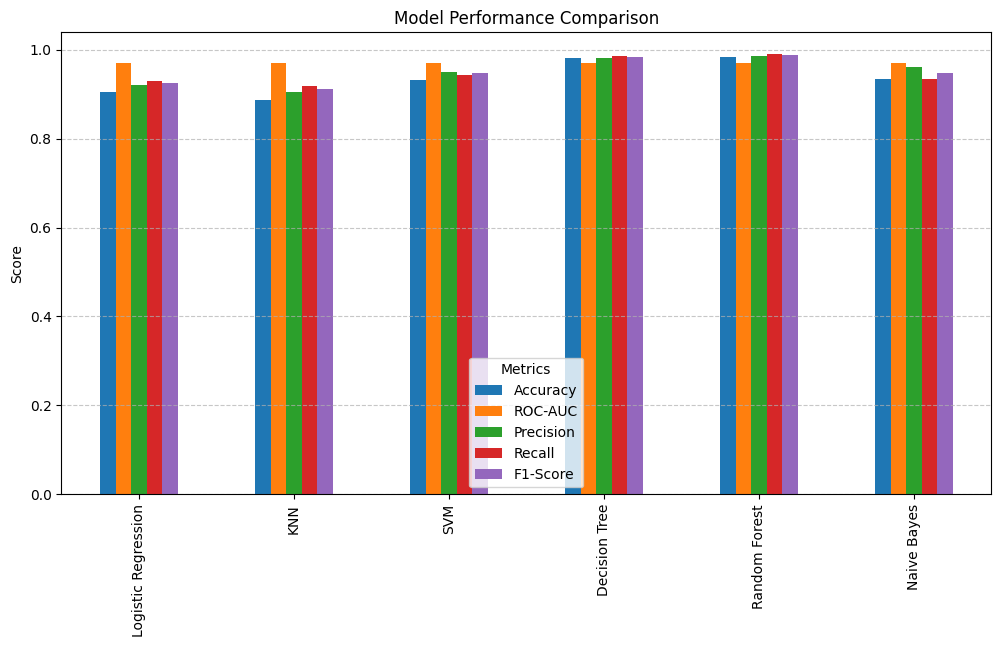

In [123]:
results_df = pd.DataFrame(results).T  # Models as rows

# Plot all metrics
if "ROC-AUC" in results_df.columns and results_df["ROC-AUC"].isnull().all():
    results_df = results_df.drop(columns=["ROC-AUC"])

# Plot grouped bar chart
results_df.plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
#plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Out of all the models Random Forest has higest values in metrices**


In [124]:
y_train_pred = models["Random Forest"].predict(X_train)
y_test_pred = models["Random Forest"].predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 1.0
Test Accuracy: 0.9840823970037453


#saving the model

In [129]:
import pickle

with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(models["Random Forest"], file)

In [140]:
with open("KNN.pkl", "wb") as file:
    pickle.dump(models["KNN"], file)

In [141]:
df['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
1,0.62216
0,0.37784


In [142]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [143]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[364  26]
 [ 44 634]]


In [145]:
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

In [146]:
with open("naive.pkl", "wb") as file:
    pickle.dump(models["Naive Bayes"], file)

#Final Conclusion

*Random forest model becomes more biased for training data

*The optimal model for this problem is Naive bayes algorithm